In [102]:

import pandas as pd 
from download_datasets import download_general_dataset
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = download_general_dataset()
df = pd.read_csv(dataset_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [104]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [105]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df: pd.DataFrame, column: str) -> pd.DataFrame:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

df = label_encode(df, "smoker")
df = label_encode(df, "sex")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [106]:
regions = df["region"].unique()
df = pd.get_dummies(df, columns=["region"])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [107]:
df.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex                 0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

<Axes: >

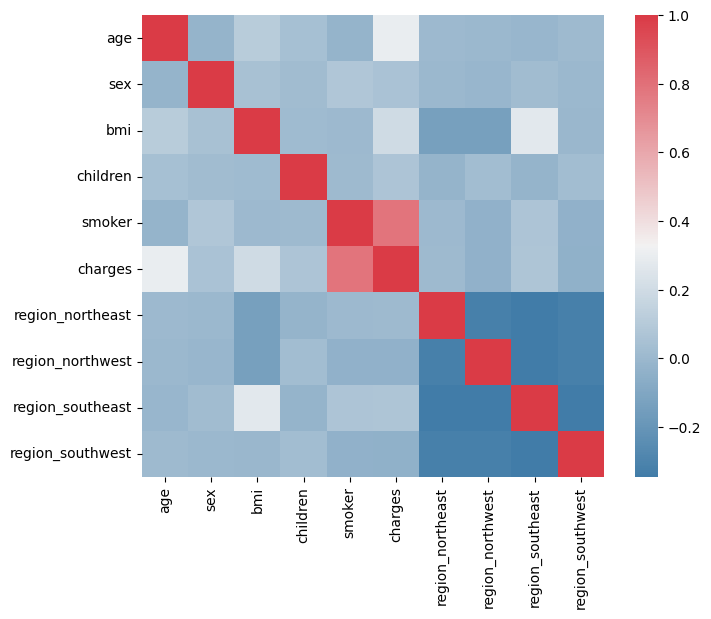

In [108]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

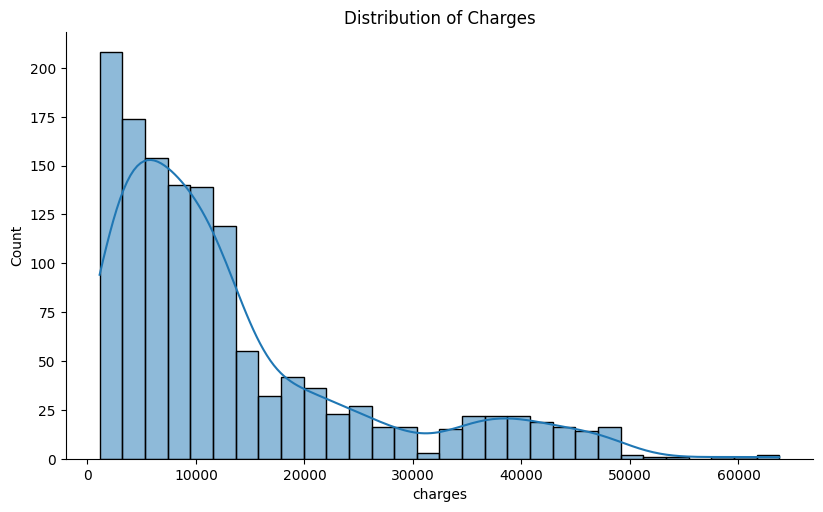

In [109]:
sns.displot(x='charges',data=df,aspect=10/6,kde=True).set(title='Distribution of Charges')


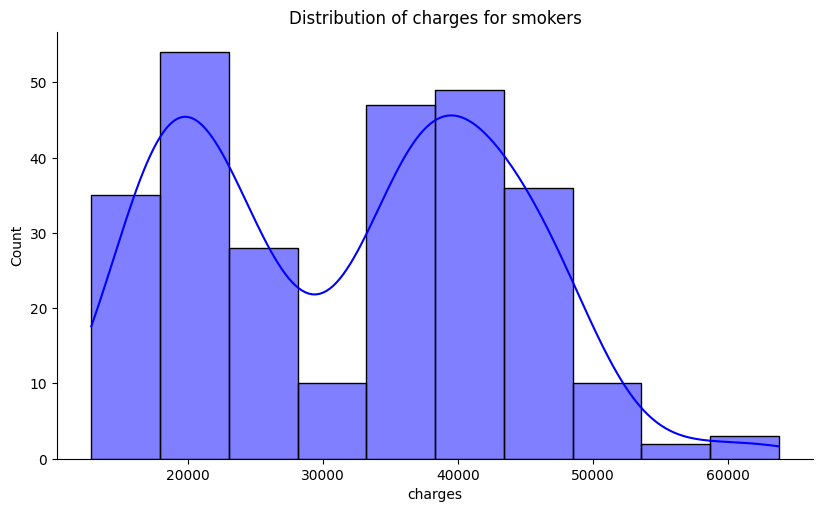

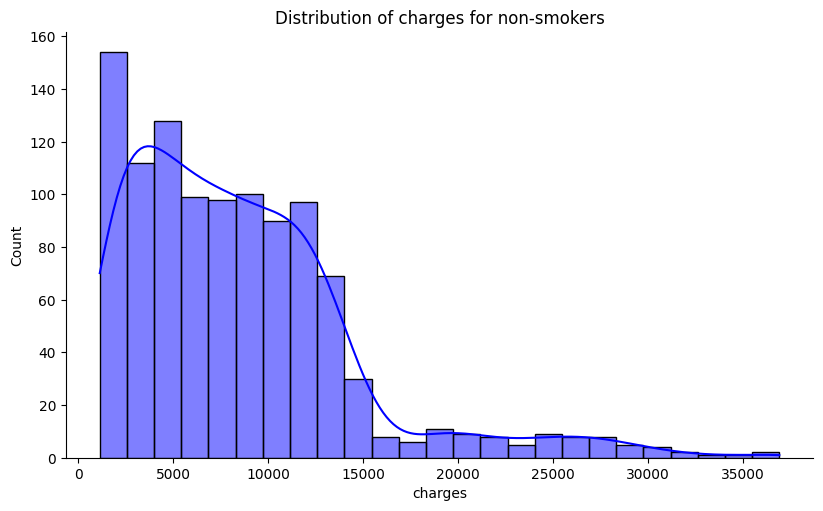

In [110]:


sns.displot(data=(df[df["smoker"] == True]), x="charges", color='b', aspect=10/6, kde=True).set(title="Distribution of charges for smokers")
sns.displot(data=(df[df["smoker"] == False]), x="charges", color='b', aspect=10/6, kde=True).set(title="Distribution of charges for non-smokers")

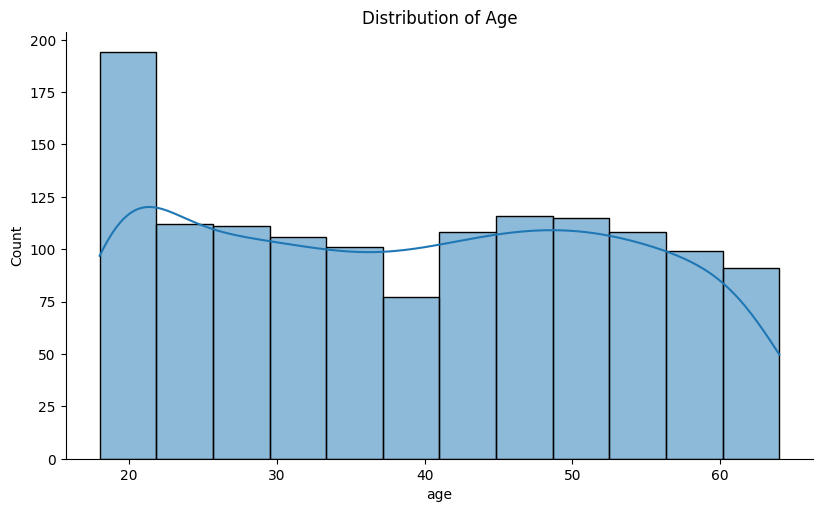

In [111]:
sns.displot(x='age',data=df,aspect=10/6,kde=True).set(title='Distribution of Age')

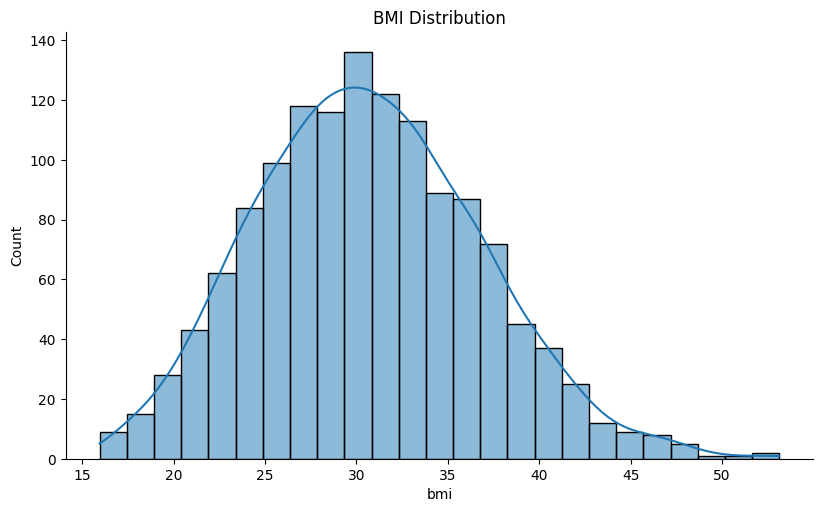

In [112]:
sns.displot(x="bmi", data=df, kde=True, aspect=10/6).set(title="BMI Distribution")

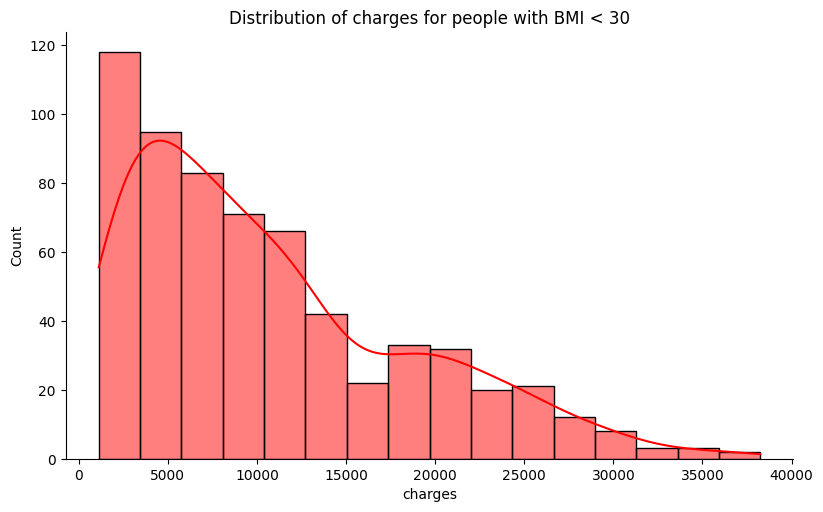

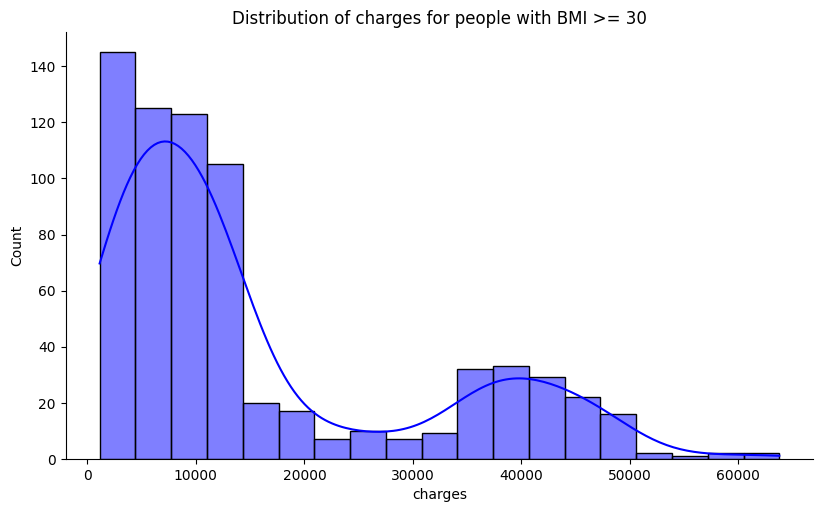

In [113]:

sns.displot(
    data=df[(df["bmi"] < 30)], x="charges", kde=True, aspect=10 / 6, color="r"
).set(title="Distribution of charges for people with BMI < 30")
sns.displot(
    data=df[(df["bmi"] >= 30)], x="charges", kde=True, aspect=10 / 6, color="b"
).set(title="Distribution of charges for people with BMI >= 30")

In [114]:
from sklearn.model_selection import train_test_split
x = df.drop(["charges", "region_northeast", "region_northwest", "region_southeast", "region_southwest"], axis = 1)
y = df["charges"]

In [115]:
from numpy import ndarray
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

def show_performance(y_test: pd.Series, y_pred: ndarray):
    print(f"Mean: {y_test.mean()}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print(f"MRSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

In [116]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
ltr = LinearRegression().fit(x_train,y_train)
y_pred = ltr.predict(x_test)
show_performance(y_test, y_pred)


Mean: 13433.773662325373
R^2 Score: 0.7952171980481992
MRSE: 5678.017317091147
MAE: 3987.198650627585
MAPE: 0.4143570736721264


In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly = poly.fit(x)
x_poly = poly.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_poly,y, random_state = 0)
plr = LinearRegression().fit(x_train,y_train)
y_pred = plr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 13433.773662325373
R^2 Score: 0.8849197344147236
MRSE: 4256.478068102449
MAE: 2761.134814359848
MAPE: 0.3037555810037418


In [121]:
from pathlib import Path
import joblib
from typing import NamedTuple

# NOTE: When you update this dto, don't forget to update the corresponding
#       dto in Fyama/backend/ml/dto.py
class GeneralModelDto(NamedTuple):
    regions: ndarray
    poly: PolynomialFeatures
    model: LinearRegression
models_dir = Path("models")
if not models_dir.is_dir():
    models_dir.mkdir(parents=True)

joblib.dump(value=GeneralModelDto(regions, poly,model=plr), filename=models_dir / "general.pkl")

['models\\general.pkl']

In [119]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
dtr = DecisionTreeRegressor().fit(x_train,y_train)
y_pred = dtr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 13433.773662325373
R^2 Score: 0.7181934047559204
MRSE: 6660.787042343041
MAE: 3070.561891310448
MAPE: 0.47435839574947913
